## DAY8 `value_counts` 全解

https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

### 1. 基本语法

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 注意：笔记里的url不能直接放到这里，比如点击raw进入下面的url才可以！
url = 'https://raw.githubusercontent.com/datoujinggzj/DataScienceCrashCourse/master/data/Iris.csv'
df_iris = pd.read_csv(url)

In [3]:
df_sample = df_iris.sample(n = 100,
          weights = [20]*50+[50]*50+[30]*50,
          random_state=1)

In [4]:
df_sample

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
103,104,6.3,2.9,5.6,1.8,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
...,...,...,...,...,...,...
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
11,12,4.8,3.4,1.6,0.2,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa


In [5]:
df_sample['Species'].value_counts()

# 返回每一类有多少个

Iris-versicolor    38
Iris-virginica     33
Iris-setosa        29
Name: Species, dtype: int64

In [6]:
type(df_sample['Species'].value_counts())
# 返回的是一个series

pandas.core.series.Series

### 2. 参数解析

#### 2.1 ascending

In [7]:
df_sample['Species'].value_counts(ascending=True)
# 升序排列，默认是倒序

Iris-setosa        29
Iris-virginica     33
Iris-versicolor    38
Name: Species, dtype: int64

#### 2.2 dropna

In [8]:
test1 = df_sample['Species'].replace({'Iris-versicolor':np.nan})
# test1是为了尝试一下nan是否会被value_counts抓取

test1.value_counts(ascending=True)
# nan没有被count出来

Iris-setosa       29
Iris-virginica    33
Name: Species, dtype: int64

In [9]:
test1.value_counts(ascending=True,
                   dropna = False)

Iris-setosa       29
Iris-virginica    33
NaN               38
Name: Species, dtype: int64

#### 2.3 normalize

In [10]:
test1.value_counts(ascending=True,
                   dropna = False,
                  normalize = True)

Iris-setosa       0.29
Iris-virginica    0.33
NaN               0.38
Name: Species, dtype: float64

#### 2.4 百分比

In [11]:
pd.set_option('display.float_format', '{:.0f}%'.format)
test1.value_counts(ascending=True,
                   dropna = False,
                  normalize = True)*100

Iris-setosa      29%
Iris-virginica   33%
NaN              38%
Name: Species, dtype: float64

In [12]:
pd.reset_option('display.float_format')

In [13]:
test1.value_counts(normalize = True).to_frame().style.format('{:.2%}')

,Species
Iris-virginica,53.23%
Iris-setosa,46.77%


#### 2.5 bins

In [14]:
df_sample.Id.value_counts(bins=3)

(50.667, 100.333]    38
(100.333, 150.0]     33
(0.85, 50.667]       29
Name: Id, dtype: int64

In [15]:
df_sample.Id.value_counts(bins=[0,10,80,100,150])

(10.0, 80.0]      44
(100.0, 150.0]    33
(80.0, 100.0]     16
(-0.001, 10.0]     7
Name: Id, dtype: int64

<AxesSubplot:>

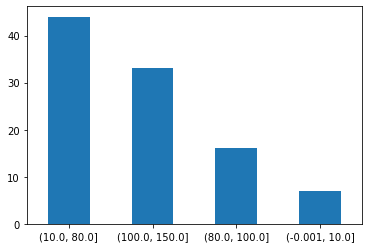

In [16]:
df_sample.Id.value_counts(bins=[0,10,80,100,150]).plot(kind='bar',rot=0)

In [17]:
df_sample.Id.value_counts(bins=3).to_frame()

,Id
"(50.667, 100.333]",38
"(100.333, 150.0]",33
"(0.85, 50.667]",29


 ## 补充 `style.format` 使用（讲解在DAY8 solution中）

In [21]:
# 下载引用即可

# read_csv的时候就进行清洗
df = pd.read_csv('./data/Salaries.gz',low_memory=False) \
       .replace('Not Provided', np.nan)\
       .astype({"BasePay":float, "OtherPay":float, "OvertimePay":float})

In [22]:
# 设置options

pd.set_option('display.max_colwidth',40)
pd.set_option('display.precision',3)
pd.set_option('display.max_rows',6)
pd.set_option('display.max_columns',6)

In [23]:
df

,Id,EmployeeName,JobTitle,...,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT...,...,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),...,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),...,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...
148651,148652,Not provided,Not provided,...,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,...,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",...,NaN,San Francisco,PT


In [24]:
df.head(3)[["BasePay","OtherPay","TotalPay","TotalPayBenefits"]]\
            .style.format({"BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})

,BasePay,OtherPay,TotalPay,TotalPayBenefits
0,"$ 167,411","$ 400,184","$ 567,595","$ 567,595"
1,"$ 155,966","$ 137,811","$ 538,909","$ 538,909"
2,"$ 212,739","$ 16,453","$ 335,280","$ 335,280"


In [25]:
df.head(3)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})

,BasePay,OtherPay,TotalPay,TotalPayBenefits,JobTitle,EmployeeName
0,"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
1,"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
2,"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI


In [26]:
df.head(3)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .hide(axis='index')\
                 # .hide(axis='columns')

BasePay,OtherPay,TotalPay,TotalPayBenefits,JobTitle,EmployeeName
"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI


In [27]:
df.head(3)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .hide(axis='index')\
                  .highlight_max(color='#ff8725')\
                  .highlight_min(color='#90ee90')           

BasePay,OtherPay,TotalPay,TotalPayBenefits,JobTitle,EmployeeName
"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI


In [28]:
df.head(10)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .hide(axis='index')\
                  .background_gradient(cmap='Reds')

BasePay,OtherPay,TotalPay,TotalPayBenefits,JobTitle,EmployeeName
"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI
"$ 77,916","$ 198,307","$ 332,344","$ 332,344",wire rope cable maintenance mechanic,CHRISTOPHER CHONG
"$ 134,402","$ 182,235","$ 326,373","$ 326,373","deputy chief of department,(fire department)",PATRICK GARDNER
"$ 118,602","$ 189,083","$ 316,286","$ 316,286",assistant deputy chief ii,DAVID SULLIVAN
"$ 92,492","$ 134,426","$ 315,981","$ 315,981","battalion chief, (fire department)",ALSON LEE
"$ 256,577","$ 51,322","$ 307,899","$ 307,899",deputy director of investments,DAVID KUSHNER
"$ 176,933","$ 40,132","$ 303,428","$ 303,428","battalion chief, (fire department)",MICHAEL MORRIS
"$ 285,262","$ 17,116","$ 302,378","$ 302,378","chief of department, (fire department)",JOANNE HAYES-WHITE


In [29]:
df.head(3)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .hide(axis='index')\
                  .set_properties(**{'background-color': 'black',                                                   
                                    'color': '#00d6b9',                       
                                    'border-color': 'white'})

BasePay,OtherPay,TotalPay,TotalPayBenefits,JobTitle,EmployeeName
"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI


In [30]:
df.head(3)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .hide(axis='index')\
                  .applymap(lambda x: f"color: {'#e04da2' if isinstance(x,float) else('red' if str(x).startswith('D') or str(x).endswith('D') else '#3773ff')}")

BasePay,OtherPay,TotalPay,TotalPayBenefits,JobTitle,EmployeeName
"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI


In [31]:
df.head(3)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .hide(axis='index')\
                  .applymap(lambda x: f"color: {'#e04da2' if isinstance(x,float) else('red' if str(x).startswith('D') or str(x).endswith('D') else '#3773ff')}")\
                  .bar(subset=["OtherPay"], color='#90ee90')\
                  .bar(subset=["BasePay"], color='#f7c9c5')\
                  .bar(subset=["TotalPay"], color='#b5cdff')

BasePay,OtherPay,TotalPay,TotalPayBenefits,JobTitle,EmployeeName
"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI


In [32]:
df.head(10)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .hide(axis='index')\
                  .applymap(lambda x: f"color: {'black' if isinstance(x,float) else('red' if str(x).startswith('D') or str(x).endswith('D') else '#3773ff')}")\
                  .bar(subset=["OtherPay","BasePay","TotalPay"], cmap='hsv')

BasePay,OtherPay,TotalPay,TotalPayBenefits,JobTitle,EmployeeName
"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI
"$ 77,916","$ 198,307","$ 332,344","$ 332,344",wire rope cable maintenance mechanic,CHRISTOPHER CHONG
"$ 134,402","$ 182,235","$ 326,373","$ 326,373","deputy chief of department,(fire department)",PATRICK GARDNER
"$ 118,602","$ 189,083","$ 316,286","$ 316,286",assistant deputy chief ii,DAVID SULLIVAN
"$ 92,492","$ 134,426","$ 315,981","$ 315,981","battalion chief, (fire department)",ALSON LEE
"$ 256,577","$ 51,322","$ 307,899","$ 307,899",deputy director of investments,DAVID KUSHNER
"$ 176,933","$ 40,132","$ 303,428","$ 303,428","battalion chief, (fire department)",MICHAEL MORRIS
"$ 285,262","$ 17,116","$ 302,378","$ 302,378","chief of department, (fire department)",JOANNE HAYES-WHITE


In [33]:
df.head(10)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .apply_index(lambda x: np.where(x % 2 == 0, "background-color: #28d6ff;", "background-color: #bd56fd"))

,BasePay,OtherPay,TotalPay,TotalPayBenefits,JobTitle,EmployeeName
0,"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
1,"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
2,"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI
3,"$ 77,916","$ 198,307","$ 332,344","$ 332,344",wire rope cable maintenance mechanic,CHRISTOPHER CHONG
4,"$ 134,402","$ 182,235","$ 326,373","$ 326,373","deputy chief of department,(fire department)",PATRICK GARDNER
5,"$ 118,602","$ 189,083","$ 316,286","$ 316,286",assistant deputy chief ii,DAVID SULLIVAN
6,"$ 92,492","$ 134,426","$ 315,981","$ 315,981","battalion chief, (fire department)",ALSON LEE
7,"$ 256,577","$ 51,322","$ 307,899","$ 307,899",deputy director of investments,DAVID KUSHNER
8,"$ 176,933","$ 40,132","$ 303,428","$ 303,428","battalion chief, (fire department)",MICHAEL MORRIS
9,"$ 285,262","$ 17,116","$ 302,378","$ 302,378","chief of department, (fire department)",JOANNE HAYES-WHITE


In [34]:
df.head(10)[["BasePay","OtherPay","TotalPay","TotalPayBenefits","JobTitle","EmployeeName"]]\
            .style.format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .apply_index(lambda x: np.where(x % 2 == 0, "background-color: #28d6ff;", "background-color: #bd56fd"))\
                  .apply_index(lambda x: np.where([col.startswith('T') for col in x], "background-color: #4fea79;", "background-color: #fed460"),axis=1)\
                  .format_index(lambda x: x.upper(), axis=1)\
                  .format_index(lambda x: x+1)\
                  .set_table_styles(
                                        [{'selector': 'tr:hover',
                                          'props': 'background-color: lightblue; font-size: 1em;'}]
                                    )

,BASEPAY,OTHERPAY,TOTALPAY,TOTALPAYBENEFITS,JOBTITLE,EMPLOYEENAME
1,"$ 167,411","$ 400,184","$ 567,595","$ 567,595",general manager-metropolitan transit authority,NATHANIEL FORD
2,"$ 155,966","$ 137,811","$ 538,909","$ 538,909",captain iii (police department),GARY JIMENEZ
3,"$ 212,739","$ 16,453","$ 335,280","$ 335,280",captain iii (police department),ALBERT PARDINI
4,"$ 77,916","$ 198,307","$ 332,344","$ 332,344",wire rope cable maintenance mechanic,CHRISTOPHER CHONG
5,"$ 134,402","$ 182,235","$ 326,373","$ 326,373","deputy chief of department,(fire department)",PATRICK GARDNER
6,"$ 118,602","$ 189,083","$ 316,286","$ 316,286",assistant deputy chief ii,DAVID SULLIVAN
7,"$ 92,492","$ 134,426","$ 315,981","$ 315,981","battalion chief, (fire department)",ALSON LEE
8,"$ 256,577","$ 51,322","$ 307,899","$ 307,899",deputy director of investments,DAVID KUSHNER
9,"$ 176,933","$ 40,132","$ 303,428","$ 303,428","battalion chief, (fire department)",MICHAEL MORRIS
10,"$ 285,262","$ 17,116","$ 302,378","$ 302,378","chief of department, (fire department)",JOANNE HAYES-WHITE


In [35]:
def make_pretty(styler):
    styler.format({"JobTitle": lambda x:str(x).lower(),
                          "EmployeeName": lambda x:str(x).upper(),
                          "BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "OvertimePay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                  .applymap(lambda x: f"color: {'black' if isinstance(x,float) else('red' if str(x).startswith('D') or str(x).endswith('D') else '#3773ff')}")\
                  .bar(subset=["BasePay"], cmap='Pastel1')\
                  .apply_index(lambda x: np.where(x % 2 == 0, "background-color: #28d6ff;", "background-color: #bd56fd"))\
                  .apply_index(lambda x: np.where([col.startswith('T') for col in x], "background-color: #4fea79;", "background-color: #fbbc09"),axis=1)\
                  .format_index(lambda x: x.upper(), axis=1)\
                  .format_index(lambda x: x+1)\
                  .set_table_styles([{'selector': 'tr:hover',
                                          'props': 'background-color: lightblue; font-size: 1em;'}])
                                    
    return styler

In [36]:
df.drop(['Status','Notes','Benefits'],axis=1).head(10).style.pipe(make_pretty)

,ID,EMPLOYEENAME,JOBTITLE,BASEPAY,OVERTIMEPAY,OTHERPAY,TOTALPAY,TOTALPAYBENEFITS,YEAR,AGENCY
1,1,NATHANIEL FORD,general manager-metropolitan transit authority,"$ 167,411",$ 0,"$ 400,184","$ 567,595","$ 567,595",2011,San Francisco
2,2,GARY JIMENEZ,captain iii (police department),"$ 155,966","$ 245,132","$ 137,811","$ 538,909","$ 538,909",2011,San Francisco
3,3,ALBERT PARDINI,captain iii (police department),"$ 212,739","$ 106,088","$ 16,453","$ 335,280","$ 335,280",2011,San Francisco
4,4,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,"$ 77,916","$ 56,121","$ 198,307","$ 332,344","$ 332,344",2011,San Francisco
5,5,PATRICK GARDNER,"deputy chief of department,(fire department)","$ 134,402","$ 9,737","$ 182,235","$ 326,373","$ 326,373",2011,San Francisco
6,6,DAVID SULLIVAN,assistant deputy chief ii,"$ 118,602","$ 8,601","$ 189,083","$ 316,286","$ 316,286",2011,San Francisco
7,7,ALSON LEE,"battalion chief, (fire department)","$ 92,492","$ 89,063","$ 134,426","$ 315,981","$ 315,981",2011,San Francisco
8,8,DAVID KUSHNER,deputy director of investments,"$ 256,577",$ 0,"$ 51,322","$ 307,899","$ 307,899",2011,San Francisco
9,9,MICHAEL MORRIS,"battalion chief, (fire department)","$ 176,933","$ 86,363","$ 40,132","$ 303,428","$ 303,428",2011,San Francisco
10,10,JOANNE HAYES-WHITE,"chief of department, (fire department)","$ 285,262",$ 0,"$ 17,116","$ 302,378","$ 302,378",2011,San Francisco
